In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Loading Data

In [8]:
import os
for dirname, _, filenames in os.walk('C:/Users/yrkim/Desktop/Financial-Big-Data-Festival-main/Financial-Big-Data-Festival-main/Markov Regime-Switching Model/kaggle/input_kor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/yrkim/Desktop/Financial-Big-Data-Festival-main/Financial-Big-Data-Festival-main/Markov Regime-Switching Model/kaggle/input_kor\Composite leading indicator_kor.csv


In [9]:
data = pd.read_csv("C:/Users/yrkim/Desktop/Financial-Big-Data-Festival-main/Financial-Big-Data-Festival-main/Markov Regime-Switching Model/kaggle/input_kor/Composite leading indicator_kor.csv")
data

,time,value
0,1990-01,100.17490
1,1990-02,100.04620
2,1990-03,99.97910
3,1990-04,99.91734
4,1990-05,99.82787
...,...,...
385,2022-02,99.73383
386,2022-03,99.51965
387,2022-04,99.30502
388,2022-05,99.08974


In [22]:
# 2. Spliting Data as Train and Validation

In [10]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 390
Train data length : 273
Validation data lenth : 117


In [11]:
train_data = data[:length_train].iloc[:,:2] 
train_data['time'] = pd.to_datetime(train_data['time'])  # converting to date time object
train_data

,time,value
0,1990-01-01,100.17490
1,1990-02-01,100.04620
2,1990-03-01,99.97910
3,1990-04-01,99.91734
4,1990-05-01,99.82787
...,...,...
268,2012-05-01,98.82827
269,2012-06-01,98.87264
270,2012-07-01,98.88637
271,2012-08-01,98.89851


In [12]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['time'] = pd.to_datetime(validation_data['time'])  # converting to date time object
validation_data

,time,value
273,2012-10-01,98.96667
274,2012-11-01,99.02116
275,2012-12-01,99.09911
276,2013-01-01,99.19267
277,2013-02-01,99.31300
...,...,...
385,2022-02-01,99.73383
386,2022-03-01,99.51965
387,2022-04-01,99.30502
388,2022-05-01,99.08974


In [13]:
# 3. Creating Train Dataset from Train split

In [14]:
dataset_train = train_data.value.values
dataset_train.shape

(273,)

In [15]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(273, 1)

In [16]:
# 4. Normalization / Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(273, 1)

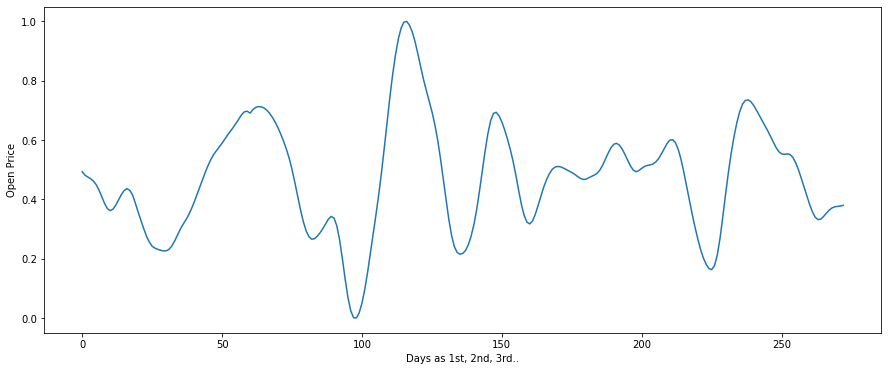

In [18]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [27]:
# 5. Creating X_train and y_train from Train data

In [19]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (223, 50)
Shape of y_train before reshape : (223,)


In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (223, 50, 1)
Shape of y_train after reshape : (223, 1)


In [22]:
X_train[0]

array([[0.49315828],
       [0.48148558],
       [0.47539981],
       [0.46979837],
       [0.46168372],
       [0.44933533],
       [0.43108529],
       [0.40848905],
       [0.38576221],
       [0.36864498],
       [0.36204406],
       [0.36706141],
       [0.3807503 ],
       [0.39873641],
       [0.41636971],
       [0.43010032],
       [0.43610899],
       [0.43046129],
       [0.41463649],
       [0.38647328],
       [0.35659226],
       [0.32801819],
       [0.30036288],
       [0.27528064],
       [0.2555867 ],
       [0.24202933],
       [0.23549824],
       [0.23145043],
       [0.2284003 ],
       [0.22624262],
       [0.2265138 ],
       [0.23133797],
       [0.24250095],
       [0.25891438],
       [0.27875252],
       [0.29850359],
       [0.31517641],
       [0.33039989],
       [0.34697204],
       [0.36731718],
       [0.39040408],
       [0.41537749],
       [0.44115537],
       [0.46690605],
       [0.49185224],
       [0.51484392],
       [0.53502398],
       [0.551

In [23]:
y_train[0]

array([0.58982308])

In [24]:
# 6. Creating RNN model

In [25]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
7/7 [==============================] - 3s 14ms/step - loss: 0.9302 - accuracy: 0.0045
Epoch 2/50
7/7 [==============================] - 0s 14ms/step - loss: 0.4571 - accuracy: 0.0045
Epoch 3/50
7/7 [==============================] - 0s 15ms/step - loss: 0.3885 - accuracy: 0.0045
Epoch 4/50
7/7 [==============================] - 0s 14ms/step - loss: 0.4145 - accuracy: 0.0045
Epoch 5/50
7/7 [==============================] - 0s 14ms/step - loss: 0.3242 - accuracy: 0.0045
Epoch 6/50
7/7 [==============================] - 0s 14ms/step - loss: 0.3893 - accuracy: 0.0045
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 0.3564 - accuracy: 0.0000e+00
Epoch 8/50
7/7 [==============================] - 0s 15ms/step - loss: 0.3416 - accuracy: 0.0000e+00
Epoch 9/50
7/7 [==============================] - 0s 15ms/step - loss: 0.2725 - accuracy: 0.0045
Epoch 10/50
7/7 [==============================] - 0s 14ms/step - loss: 0.2919 - accuracy: 0.0045
Epoch 11/50
7/7 [====

In [26]:
# 7. Evaluating Model

In [27]:
history.history["loss"]

[0.9301669597625732,
 0.4571470618247986,
 0.38847067952156067,
 0.414494127035141,
 0.3242332935333252,
 0.3892923593521118,
 0.3563700318336487,
 0.3415534198284149,
 0.27252039313316345,
 0.2919018268585205,
 0.29417404532432556,
 0.2767900228500366,
 0.24232609570026398,
 0.217499777674675,
 0.2113451212644577,
 0.1918821930885315,
 0.19805145263671875,
 0.16357071697711945,
 0.16834509372711182,
 0.1807544231414795,
 0.1852434128522873,
 0.14031487703323364,
 0.1278250813484192,
 0.13123953342437744,
 0.13249248266220093,
 0.1376485675573349,
 0.1134583055973053,
 0.10946255177259445,
 0.11369775235652924,
 0.13852068781852722,
 0.09269585460424423,
 0.09544836729764938,
 0.10164915025234222,
 0.08668111264705658,
 0.10682680457830429,
 0.07184097915887833,
 0.10620667040348053,
 0.09184905886650085,
 0.08660327643156052,
 0.07340637594461441,
 0.09234978258609772,
 0.08625758439302444,
 0.072898730635643,
 0.06543421745300293,
 0.08169412612915039,
 0.061150744557380676,
 0.06021

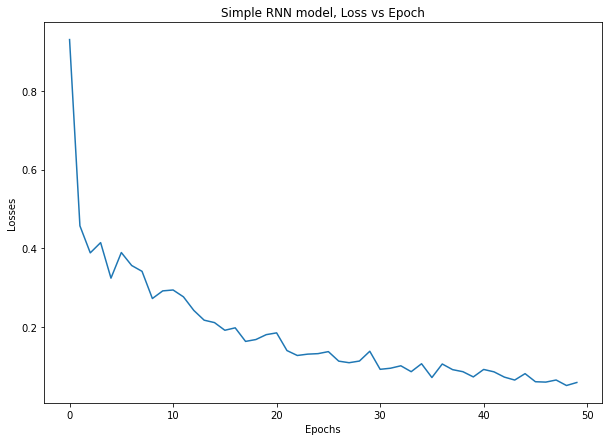

In [28]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

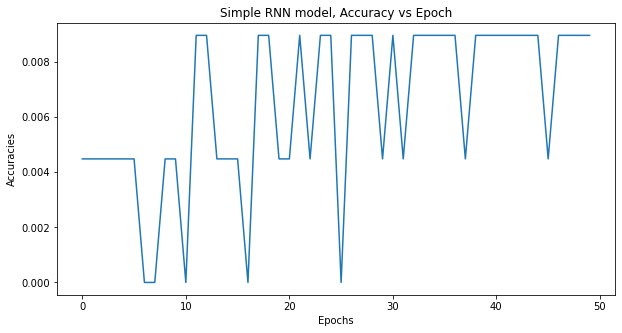

In [29]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [30]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

(223, 1)

In [31]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(223, 1)

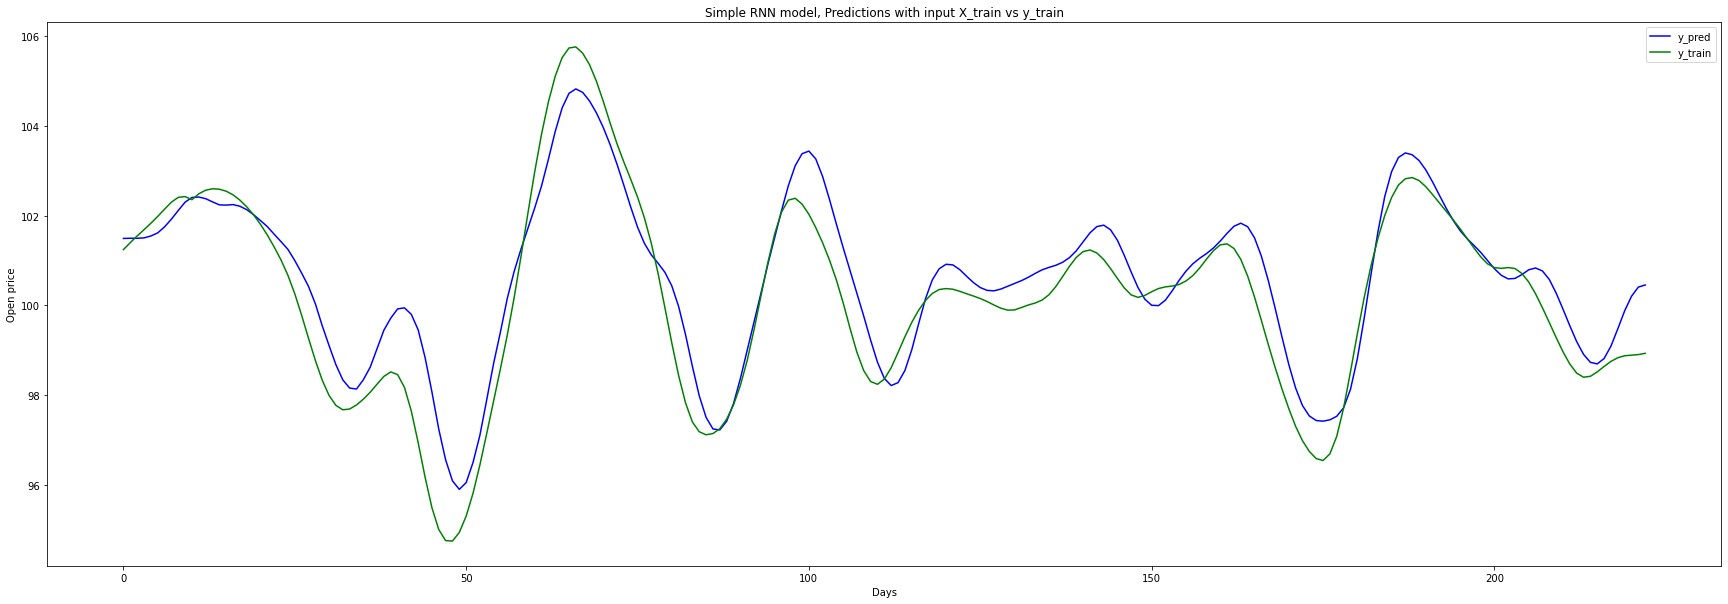

In [32]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [33]:
# 8. Creating Test Dataset from Validation Data

In [34]:
dataset_validation = validation_data.value.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (117, 1)


In [35]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [36]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [37]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (67, 50)
Shape of y_test before reshape : (67,)


In [38]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [39]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (67, 50, 1)
Shape of y_test after reshape : (67, 1)


In [40]:
# 9. Evaluating with Validation Data

In [41]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (67, 1)


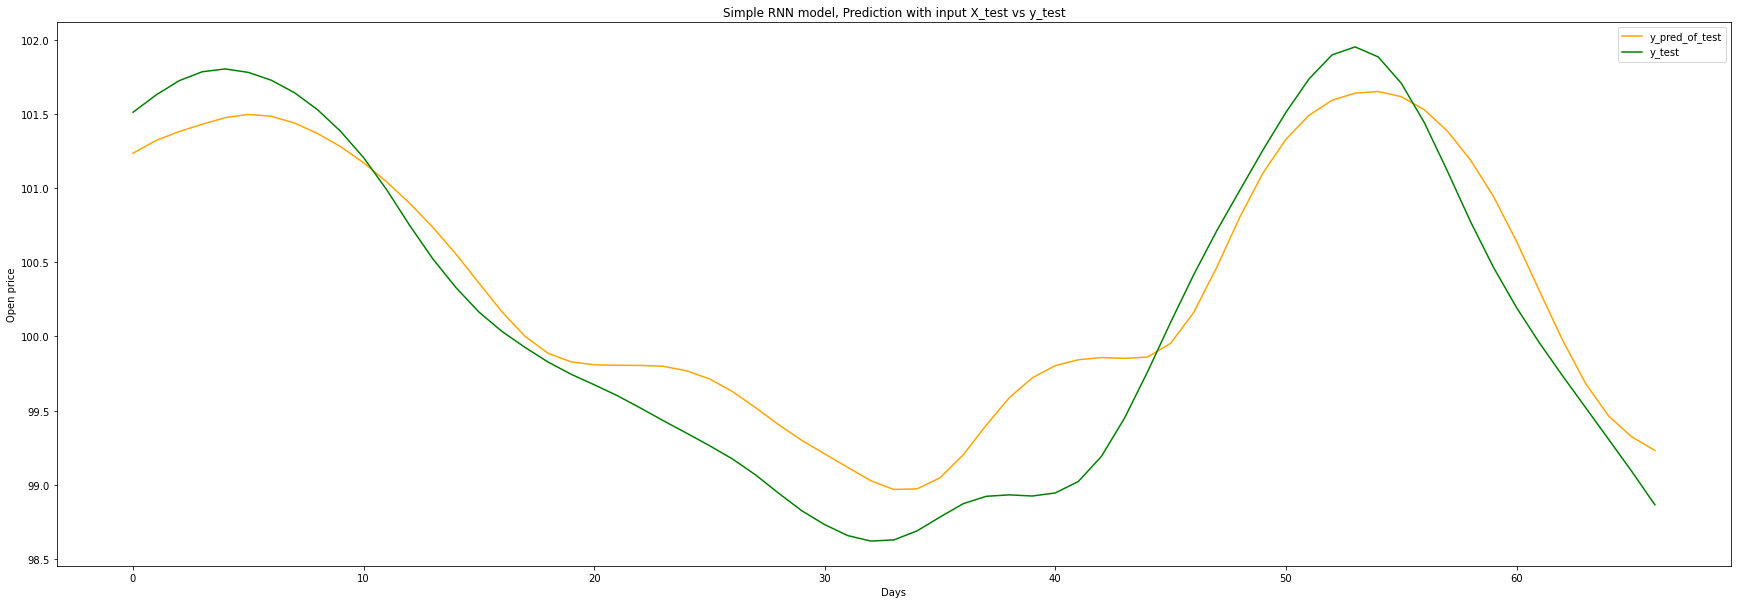

In [42]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

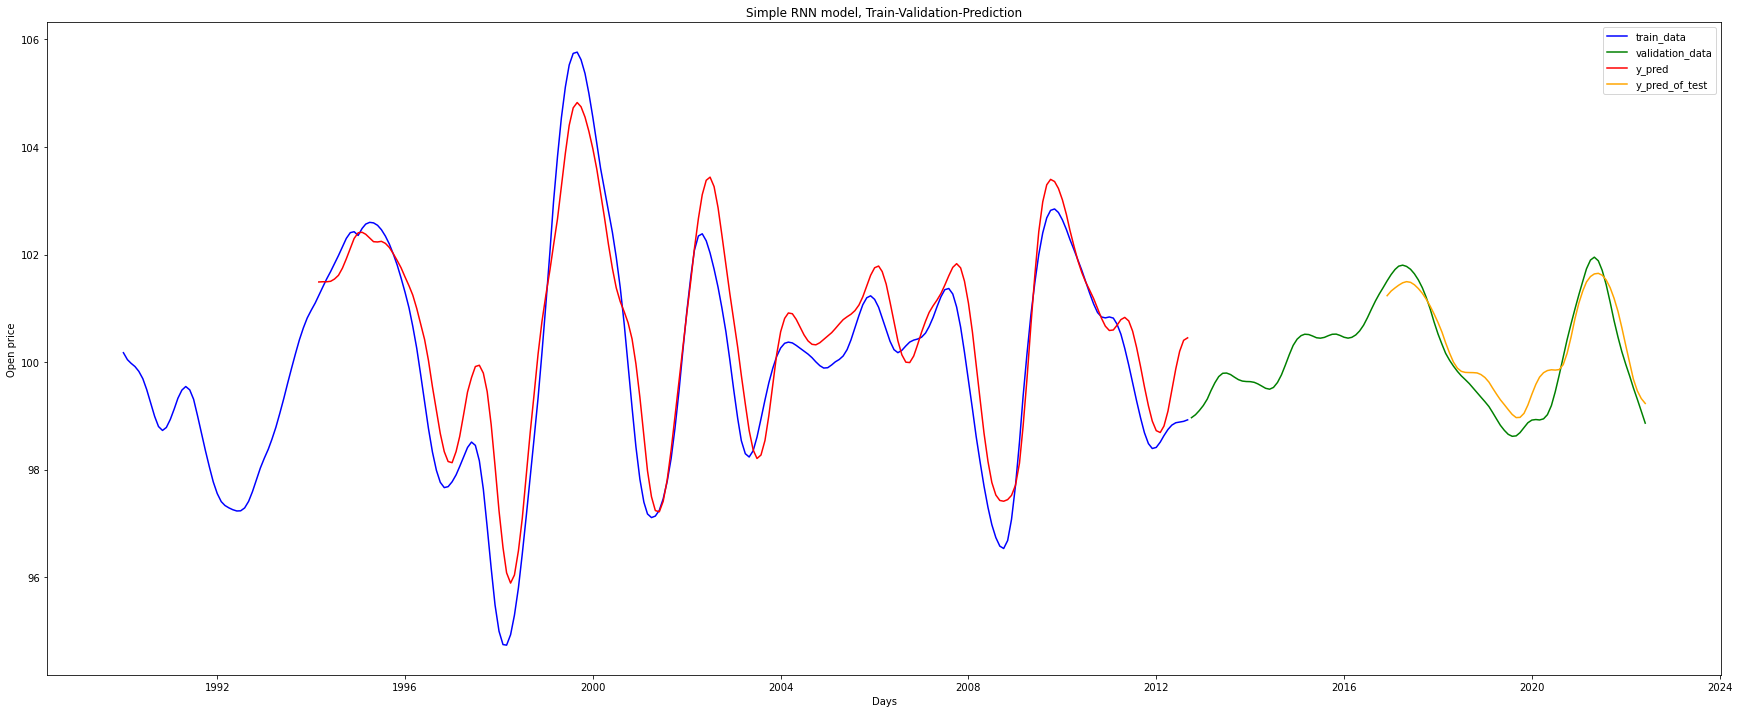

In [43]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.time, train_data.value, label = "train_data", color = "b")
plt.plot(validation_data.time, validation_data.value, label = "validation_data", color = "g")
plt.plot(train_data.time.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.time.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [44]:
# 10. Creating LSTM Model

In [45]:
y_train = scaler.fit_transform(y_train)

In [46]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
23/23 [==============================] - 3s 14ms/step - loss: 0.0471 - accuracy: 0.0045
Epoch 2/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0228 - accuracy: 0.0090
Epoch 3/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0135 - accuracy: 0.0090
Epoch 4/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0084 - accuracy: 0.0090
Epoch 5/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0080 - accuracy: 0.0090
Epoch 6/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0061 - accuracy: 0.0090
Epoch 7/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0048 - accuracy: 0.0090
Epoch 8/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0042 - accuracy: 0.0090
Epoch 9/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0032 - accuracy: 0.0090
Epoch 10/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 0.0090


In [47]:
# 11. Evaluating LSTM Model

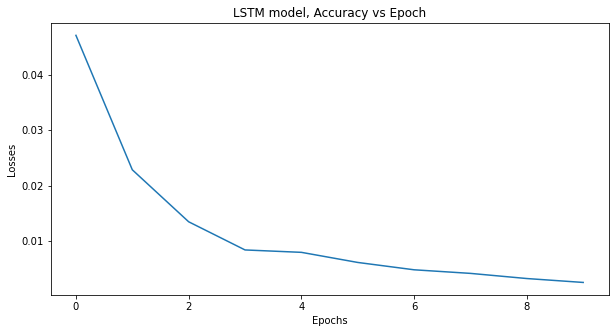

In [48]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

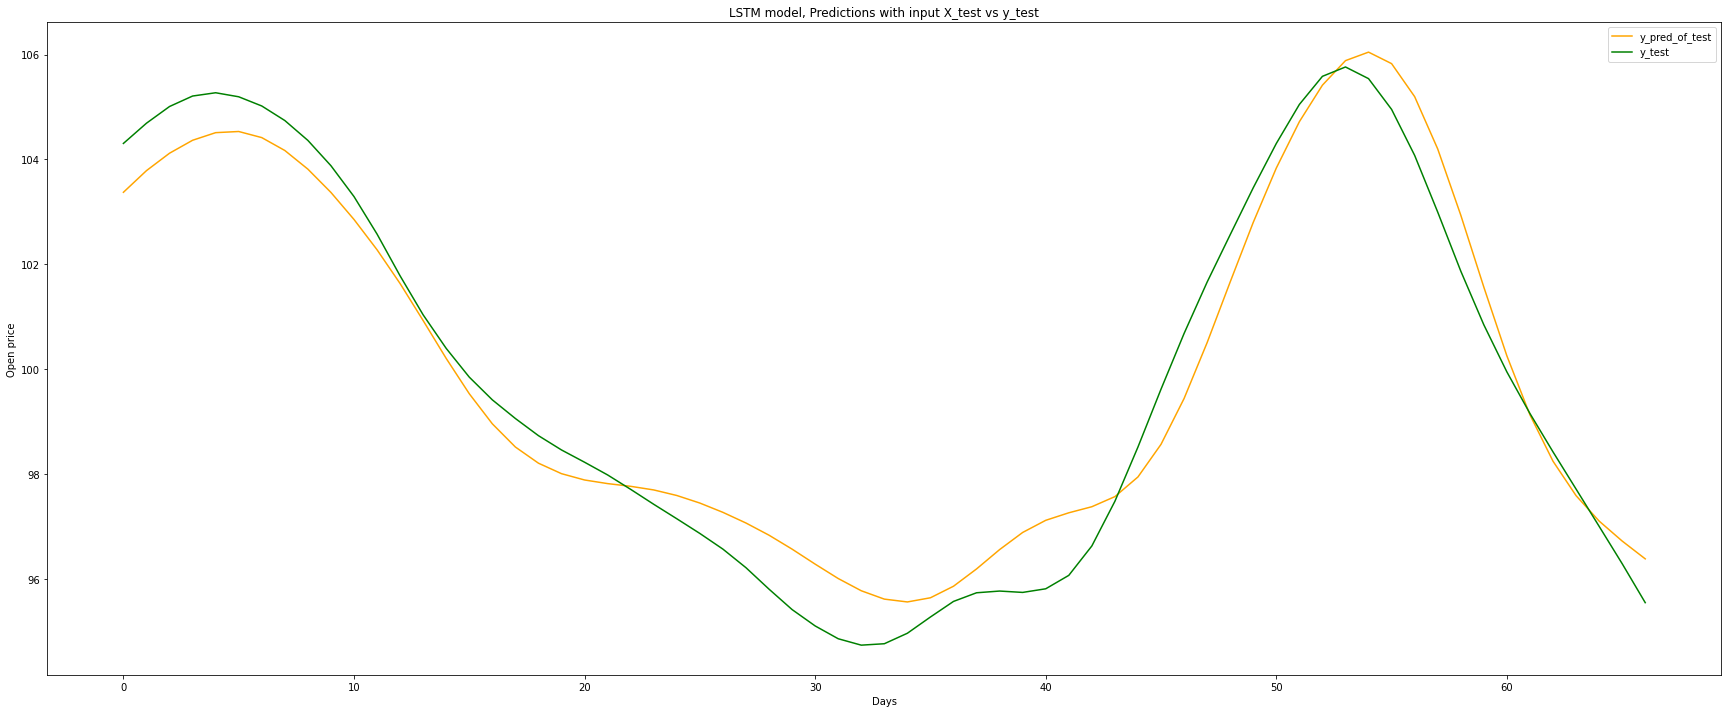

In [49]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [50]:
value = scaler.inverse_transform(model_lstm.predict(X_test))
prediction = []
for i in range(0,16):
    val = value[i,0]
    prediction.append(val)

In [51]:
pred = pd.DataFrame(prediction)
pred.to_excel('C:/Users/yrkim/Desktop/Financial-Big-Data-Festival-main/Financial-Big-Data-Festival-main/kor_pred.xlsx')

In [52]:
# 12. Future price prediction

In [53]:
data.iloc[-1]

time      2022-06
value    98.86522
Name: 389, dtype: object

In [54]:
X_input = data.iloc[-time_step:].value.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.39198107],
        [0.36233194],
        [0.33758579],
        [0.31638254],
        [0.29437762],
        [0.26944233],
        [0.2436093 ],
        [0.21861095],
        [0.19318025],
        [0.16608619],
        [0.13394203],
        [0.09683182],
        [0.06154109],
        [0.03324306],
        [0.01107602],
        [0.        ],
        [0.00244399],
        [0.02059376],
        [0.04869364],
        [0.07563156],
        [0.09058974],
        [0.09355916],
        [0.09120824],
        [0.09747434],
        [0.12069224],
        [0.17155364],
        [0.24883655],
        [0.34270196],
        [0.4427464 ],
        [0.53903477],
        [0.62796717],
        [0.70990386],
        [0.79108995],
        [0.86768229],
        [0.93517723],
        [0.98381683],
        [1.        ],
        [0.97982358],
        [0.92662027],
        [0.8470555 ],
        [0.74899568],
        [0.64697264],
        [0.55404699],
        [0.47256066],
        [0.40067315],
        [0

In [55]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 1/7/2022      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 1/7/2022 :", LSTM_prediction[0,0])

Simple RNN, Open price prediction for 1/7/2022      : 99.14545
LSTM prediction, Open price prediction for 1/7/2022 : 99.01239
